In [58]:
import matplotlib.pyplot as plt
import numpy as np

In [47]:
save_path = '/home/jnli/SHL_2023/SHL2023/page'

# 1 画7个模型的折线图

In [1]:
names = ['Bag_train/Bag_valid',]

In [2]:
names = []
for i in ['Bag','Hand','Hips','Torso','All']:
    for j in ['Bag','Hand','Hips','Torso']:
        names.append('{}_train/{}_valid'.format(i,j))

In [3]:
names

['Bag_train/Bag_valid',
 'Bag_train/Hand_valid',
 'Bag_train/Hips_valid',
 'Bag_train/Torso_valid',
 'Hand_train/Bag_valid',
 'Hand_train/Hand_valid',
 'Hand_train/Hips_valid',
 'Hand_train/Torso_valid',
 'Hips_train/Bag_valid',
 'Hips_train/Hand_valid',
 'Hips_train/Hips_valid',
 'Hips_train/Torso_valid',
 'Torso_train/Bag_valid',
 'Torso_train/Hand_valid',
 'Torso_train/Hips_valid',
 'Torso_train/Torso_valid',
 'All_train/Bag_valid',
 'All_train/Hand_valid',
 'All_train/Hips_valid',
 'All_train/Torso_valid']

In [14]:
x= ['Bag_train/Bag_valid',
 'Bag_train/Hand_valid',
 'Bag_train/Hips_valid',
 'Bag_train/Torso_valid',
 'Hand_train/Bag_valid',
 'Hand_train/Hand_valid',
 'Hand_train/Hips_valid',
 'Hand_train/Torso_valid',
 'Hips_train/Bag_valid',
 'Hips_train/Hand_valid',
 'Hips_train/Hips_valid',
 'Hips_train/Torso_valid',
 'Torso_train/Bag_valid',
 'Torso_train/Hand_valid',
 'Torso_train/Hips_valid',
 'Torso_train/Torso_valid',
 'All_train/Bag_valid',
 'All_train/Hand_valid',
 'All_train/Hips_valid',
 'All_train/Torso_valid',
 'All_train/All_valid'
 ]

In [5]:
len(names)

21

In [7]:
rf_list = [0.82,0.75,0.69,0.65, 0.73,0.77,0.68,0.60, 0.59,0.72,0.69,0.51, 0.76,0.71,0.79,0.73,  0.80,0.86,0.76,0.72,0.79]
bagging_list = [0.80,0.71,0.73,0.68,  0.69,0.72,0.64,0.60, 0.68,0.75,0.75,0.61,  0.73,0.73,0.73,0.71, 0.74,0.74,0.72,0.67,0.72]
catboost_list = [0.78,0.70,0.54,0.65,0.67,0.75,0.67,0.55,0.70,0.76,0.76,0.65,0.68,0.72,0.78,0.69,0.74,0.77,0.66,0.67,0.71]
lightgbm_list = [0.84,0.81,0.70,0.64 ,  0.72,0.79,0.70,0.68,   0.63,0.74,0.74,0.63,  0.75,0.75,0.73,0.73,   0.81,0.82,0.74,0.74,0.78]
xgb_list = [0.85,0.83,0.71,0.70 ,  0.73,0.78,0.68,0.65,   0.62,0.76,0.76,0.63,   0.74,0.75,0.75,0.75,  0.81,0.83,0.74,0.75,0.79 ]
xgb_light_rf_integrated  = [0.85,0.83,0.69,0.67,  0.73,0.78,0.68,0.66, 0.61,0.76,0.75,0.60, 0.75,0.76,0.75,0.75,   0.82,0.84,0.76,0.75,0.79]
xgb_light_rf_mv = [0.84,0.80,0.69,0.68 ,  0.73,0.77,0.68,0.65 , 0.61,0.73,0.74,0.59,  0.74,0.74,0.74,0.74,  0.80,0.82,0.74,0.74,0.77]

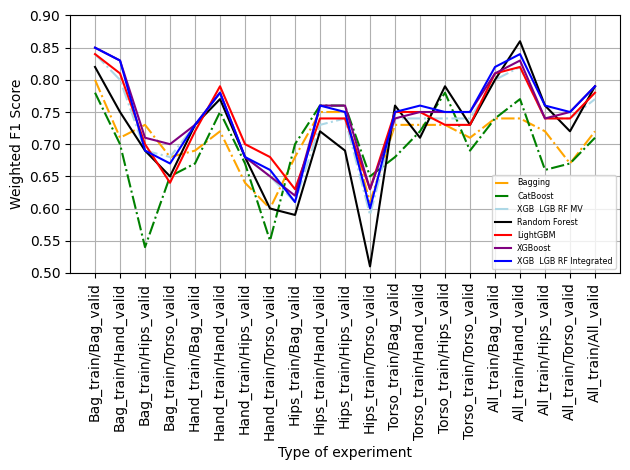

<Figure size 640x480 with 0 Axes>

In [72]:
import matplotlib.pyplot as plt

plt.plot(x, bagging_list, label='Bagging', linestyle='-.', color='orange')
plt.plot(x, catboost_list, label='CatBoost', linestyle='-.', color='green')
plt.plot(x, xgb_light_rf_mv, label='XGB  LGB RF MV', linestyle='-.', color='lightblue')

plt.plot(x, rf_list, label='Random Forest', linestyle='-', color='black')
plt.plot(x, lightgbm_list, label='LightGBM', linestyle='-', color='red')
plt.plot(x, xgb_list, label='XGBoost', linestyle='-', color='purple')
plt.plot(x, xgb_light_rf_integrated, label='XGB  LGB RF Integrated' , linestyle='-',color='blue')

plt.xlabel('Type of experiment')
plt.ylabel('Weighted F1 Score')
plt.xticks(rotation=90)
plt.legend(fontsize='xx-small')  # 调整标签的字体大小为小号
plt.grid(True)
plt.ylim(0.50, 0.90)  # 设置Y轴的范围，根据需要进行调整
plt.yticks([0.50, 0.55, 0.60, 0.65, 0.70,0.75,0.80,0.85,0.90])  # 设置Y轴刻度的位置和标签
plt.tight_layout()  # 调整图像布局，防止标签重叠
plt.show()
plt.savefig('{}/model_choose_from_7.png'.format(save_path))  # 保存图像为plot.png文件

# 2 特征重要性图

In [52]:
choose_feature_dict = {'norm_acc_std_window_20_mean': 0.32408260619411783,
 'norm_acc_energy': 0.20834259862303234,
 'distance_railways': 0.19602124694244943,
 'distance_subway': 0.16697427264568254,
 'speed_wd_max_log': 0.14966462493369015,
 'code': 0.14098785254954935,
 'distance_bus_routes': 0.12392275082093462,
 'norm_acc_std': 0.09786245885840905,
 'speed_log': 0.0740791871446469,
 'speed_square': 0.06263273093976847,
 'norm_mag_peak_frequency_window_20_mean': 0.0613174817328271,
 'norm_acc_entropy': 0.06070995944806588,
 'ACC_y_std_window_20_mean': 0.04860076780378457,
 'distance_parks': 0.047559055955268756,
 'distance_London': 0.04505388190603408,
 'north': 0.03737089593753589,
 'MAG_y_energy': 0.03711268403823448,
 'distance_bus_stops': 0.03649277848729929,
 'norm_gyr_min_window_20_mean': 0.035865132420750304,
 'latitude': 0.03256179669182618,
 'acc_wd_std': 0.0316419703044136,
 'ACC_x_energy': 0.026925098228705435,
 'distance_Brighton': 0.025886586011016687,
 'GYR_z_entropy': 0.025825616720359112,
 'GYR_x_entropy': 0.024646147387385554,
 'number_window_20_mean': 0.023512805665299286,
 'is_stop': 0.023434673185007193,
 'speed_dif': 0.023001672618778293,
 'ACC_y_peak_frequency': 0.02235244712922947,
 'ACC_y_std': 0.02226511031264558,
 'longitude_window_20_std': 0.021484307026307388,
 'distance': 0.02102747239082539,
 'norm_acc_cal_range': 0.020809498139610447,
 'east': 0.020038579229314485,
 'norm_acc_peak_frequency': 0.019318345816884873,
 'norm_acc_max': 0.01880650711739225,
 'ACC_x_std': 0.018108726850901213,
 'ACC_y_energy': 0.017606409806845857,
 'number': 0.017559957130946102,
 'longitude': 0.0172708681695523,
 'norm_gyr_median': 0.017255713467737868,
 'norm_gyr_median_window_20_mean': 0.015885221737008206,
 'ACC_z_mean': 0.015453872479948455,
 'gps_snr_mean_window_20_mean': 0.014431344533667841,
 'GYR_z_std': 0.013642271097210173,
 'norm_gyr_max': 0.01358670894680084,
 'speed': 0.012998828108917554,
 'ACC_x_entropy': 0.012285408073271933,
 'ACC_y_entropy': 0.0117283935921907,
 'gps_snr_mean': 0.011077104325570917,
 'ACC_z_median': 0.010987822258437223,
 'norm_mag_avg_frequency': 0.010771741746936452,
 'speed_wd_std': 0.010665300258870955,
 'gps_snr_max': 0.010621671933432216,
 'ACC_y_max': 0.009792141967573536,
 'acc_wd_max_log': 0.008970037739152266,
 'north_speed': 0.00887755016822827,
 'MAG_x_std': 0.0087940720853589,
 'accuracy': 0.008656889128337397,
 'ACC_x_cal_range': 0.008464931250818755,
 'norm_acc_min': 0.008070707596678214,
 'norm_mag_min': 0.007808134476147935,
 'longitude_window_20_mean': 0.0077397454028628795,
 'GYR_z_cal_range': 0.007673511964059135,
 'GYR_z_peak_frequency': 0.007661249843628826,
 'norm_gyr_min': 0.007609748212934131,
 'GYR_x_max': 0.007565430432077899,
 'norm_mag_median': 0.0072861465097882674,
 'GYR_y_energy': 0.007062593488387009,
 'norm_acc_mean': 0.006891115840757062,
 'altitude': 0.006454343681615185,
 'norm_mag_cal_range': 0.006309550887667134,
 'GYR_z_avg_frequency': 0.006247834613941946,
 'GYR_y_peak_frequency': 0.006243608507480776,
 'ACC_x_peak_frequency': 0.006011330921879112,
 'ACC_z_min': 0.005960876406459607,
 'GYR_y_std': 0.0056926182039771026,
 'ACC_y_min': 0.005642918546807764,
 'norm_gyr_avg_frequency': 0.005546300007543119,
 'speed_dlt': 0.0048876880092554266,
 'GYR_x_peak_frequency': 0.0048693432708059115,
 'ACC_y_mean': 0.00471938283370003,
 'north_dlt': 0.004668212369948412,
 'ACC_y_cal_range': 0.004584370665216527,
 'error': 0.004583088222063201,
 'MAG_x_cal_range': 0.004511287908081555,
 'ACC_x_avg_frequency': 0.004460863033772676,
 'ACC_y_avg_frequency': 0.0044257523759431705,
 'gps_snr_std': 0.00434955148368994,
 'ACC_z_max': 0.004312750190663827,
 'norm_mag_max': 0.004282675646142865,
 'MAG_x_energy': 0.004224140644004497,
 'GYR_y_std_window_20_mean': 0.004069096495410596,
 'MAG_y_median': 0.004065918624794037,
 'GYR_x_std': 0.0040161293607511445,
 'MAG_z_energy': 0.004000262933607013,
 'norm_mag_std': 0.003995200381654915,
 'east_dlt': 0.0038182504630405573,
 'norm_mag_entropy': 0.0037132543938556187,
 'norm_mag_mean': 0.00366826961065852,
 'ACC_y_median': 0.0035320484476238896,
 'ACC_x_max': 0.003497271864020733,
 'MAG_z_avg_frequency': 0.003371365944680408,
 'east_speed': 0.0031978839757637718,
 'GYR_y_cal_range': 0.0031277859226368143,
 'availability': 0.0029754747296071534,
 'norm_gyr_energy': 0.002913217884197295,
 'MAG_y_std': 0.002796418024814542,
 'MAG_z_cal_range': 0.0026145432797583033,
 'MAG_z_max': 0.002595708259987676,
 'GYR_x_cal_range': 0.002587771829797241,
 'MAG_y_avg_frequency': 0.0025658075719101267,
 'norm_acc_median': 0.00253565986694341,
 'norm_acc_avg_frequency': 0.002534393682326406,
 'ACC_z_peak_frequency': 0.002403707644451414,
 'MAG_z_std': 0.002394552408884793,
 'MAG_x_avg_frequency': 0.0023520105274912073,
 'MAG_z_median': 0.0023445212338565227,
 'ACC_z_entropy': 0.0022998205939037254,
 'GYR_y_avg_frequency': 0.0022691165437218074,
 'ACC_z_cal_range': 0.0022660636492309646,
 'ACC_x_mean': 0.0021113543799880403,
 'MAG_y_mean': 0.0020969746655669884,
 'norm_gyr_mean': 0.0020812462348597945,
 'ACC_x_median': 0.002033200918693661,
 'norm_gyr_std': 0.002016967100959501,
 'GYR_y_min': 0.0019809332781008555,
 'MAG_y_cal_range': 0.0019329375223059442,
 'MAG_y_max': 0.0018729817823556739,
 'MAG_z_min': 0.001837688148400795,
 'GYR_y_max': 0.0017149199102751832,
 'norm_gyr_entropy': 0.0017108935751279533,
 'MAG_x_entropy': 0.0017103207242724992,
 'ACC_z_kurtosis': 0.0016824142012490085,
 'MAG_x_min': 0.0016699271879110581,
 'GYR_z_energy': 0.001612054451491221,
 'MAG_y_min': 0.0015589147846123952,
 'ACC_z_std': 0.0015039640195544917,
 'GYR_z_min': 0.0014762789076275759,
 'acc': 0.0014679680124657212,
 'ACC_z_energy': 0.001438778737653469,
 'GYR_x_avg_frequency': 0.0013954883774070722,
 'distance_Brighton_change': 0.0013418181041580822,
 'norm_acc_kurtosis': 0.0013189809057417184,
 'distance_London_change': 0.0012657887227618572,
 'ACC_z_avg_frequency': 0.0011522418715268416,
 'norm_mag_energy': 0.0011050640804522915,
 'ACC_y_kurtosis': 0.0010852212853959254,
 'MAG_x_median': 0.0010653596339949987,
 'distance_bus_routes_change': 0.0009354510597367664,
 'norm_mag_peak_frequency': 0.0009346917525726971,
 'norm_gyr_peak_frequency': 0.0008047426440791563,
 'ACC_x_min': 0.0007953834887529738,
 'ACC_z_skewness': 0.0007953272536831591,
 'MAG_x_max': 0.0007938266112693479,
 'distance_railways_change': 0.0007867306573095718,
 'MAG_x_mean': 0.0006801829902570143,
 'GYR_x_energy': 0.0006404732344445926,
 'norm_acc_skewness': 0.0006365710253497108,
 'norm_gyr_cal_range': 0.0006342592822140828,
 'MAG_z_entropy': 0.0006330500393109085,
 'GYR_x_min': 0.0005849352469369576,
 'gps_snr_min': 0.0005640612747123818,
 'distance_parks_change': 0.0004479180544915905,
 'GYR_x_kurtosis': 0.0003873039187100374,
 'time_dlt': 0.00038162300457849886,
 'GYR_z_kurtosis': 0.0003616828756668381,
 'GYR_y_entropy': 0.00034559255372407823,
 'MAG_z_mean': 0.0003261310974729837,
 'valid_dlt': 0.0003188943779950669,
 'distance_subway_change': 0.00030833269699585055,
 'GYR_z_max': 0.00021954684910623765,
 'GYR_y_median': 0.0001787047617712841,
 'distance_change': 0.00013680528219819405,
 'MAG_y_entropy': 0.00012263252218264864,
 'error_change': 0.00010877876965336637}

In [54]:
road_network_features = ['error',
 'code',
 'distance_London',
 'distance_Brighton',
 'distance_parks',
 'distance_bus_stops',
 'distance_bus_routes',
 'distance_subway',
 'distance_railways',
 'distance_London_change',
 'distance_Brighton_change',
 'distance_parks_change',
 'distance_bus_stops_change',
 'distance_bus_routes_change',
 'distance_subway_change',
 'distance_railways_change',
 'error_change']

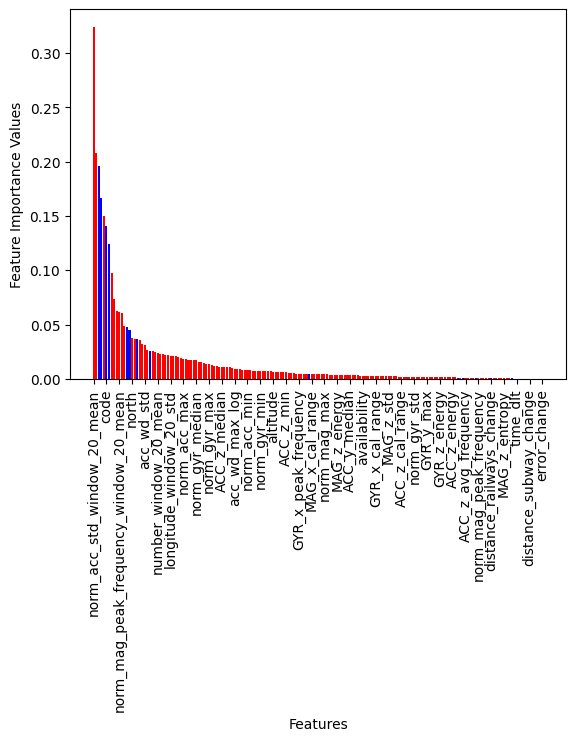

In [66]:
# 提取其他特征名称
other_features = [feat for feat in choose_feature_dict.keys() if feat not in road_network_features]

# 设置特征对应的颜色
colors = ['blue' if feat in road_network_features else 'red' for feat in choose_feature_dict.keys()]

# 绘制条形图
# 绘制条形图
plt.bar(choose_feature_dict.keys(), choose_feature_dict.values(), color=colors)

plt.xlabel('Features')
plt.ylabel('Feature Importance Values')
# plt.title('Feature Importance')

# 设置刻度的步长，例如每隔2个标签显示一个
step = 5
plt.xticks(np.arange(0, len(choose_feature_dict), step), rotation=90)

# 保存图片
plt.savefig('{}/Feature Importance.png'.format(save_path))  # 保存图像为plot.png文件

plt.show()

# 3  加路网和没加路网的效果图折线图分析

In [68]:
x= ['Bag_train/Bag_valid',
 'Bag_train/Hand_valid',
 'Bag_train/Hips_valid',
 'Bag_train/Torso_valid',
 'Hand_train/Bag_valid',
 'Hand_train/Hand_valid',
 'Hand_train/Hips_valid',
 'Hand_train/Torso_valid',
 'Hips_train/Bag_valid',
 'Hips_train/Hand_valid',
 'Hips_train/Hips_valid',
 'Hips_train/Torso_valid',
 'Torso_train/Bag_valid',
 'Torso_train/Hand_valid',
 'Torso_train/Hips_valid',
 'Torso_train/Torso_valid',
 'All_train/Bag_valid',
 'All_train/Hand_valid',
 'All_train/Hips_valid',
 'All_train/Torso_valid',
 'All_train/All_valid'
 ]

In [69]:
has_road_network_features = [0.86,0.83,0.71,0.67 ,0.74,0.79,0.69,0.66, 0.62,0.75,0.75,0.60, 0.75,0.76,0.75,0.75, 0.83,0.85,0.76,0.75,0.80]
no_road_network_features = [0.83,0.72,0.63,0.52,  0.72,0.81,0.60,0.62 , 0.60,0.74,0.67,0.58, 0.68,0.67,0.64,0.71 ,0.82,0.86,0.72,0.75,0.79]

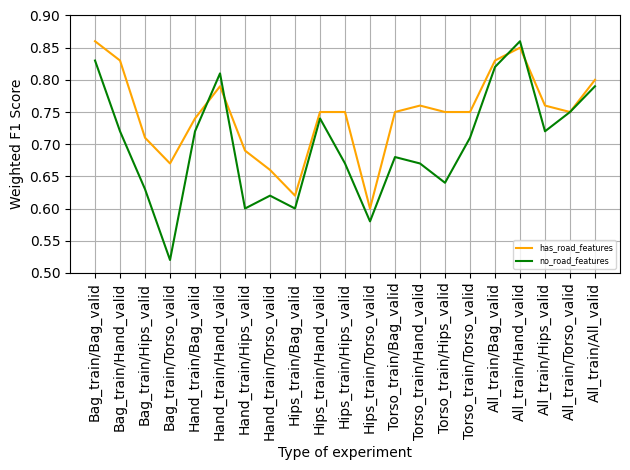

<Figure size 640x480 with 0 Axes>

In [71]:
plt.plot(x, has_road_network_features, label='has_road_features', color='orange')
plt.plot(x, no_road_network_features, label='no_road_features', color='green')

plt.xlabel('Type of experiment')
plt.ylabel('Weighted F1 Score')
plt.xticks(rotation=90)
plt.legend(fontsize='xx-small')  # 调整标签的字体大小为小号
plt.grid(True)
plt.ylim(0.50, 0.90)  # 设置Y轴的范围，根据需要进行调整
plt.yticks([0.50, 0.55, 0.60, 0.65, 0.70,0.75,0.80,0.85,0.90])  # 设置Y轴刻度的位置和标签
plt.tight_layout()  # 调整图像布局，防止标签重叠
plt.show()
plt.savefig('{}/model_road_features.png'.format(save_path))  # 保存图像为plot.png文件